<a href="https://colab.research.google.com/github/kyeongminyu97/Fashion-CNN/blob/main/fashion_classification_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

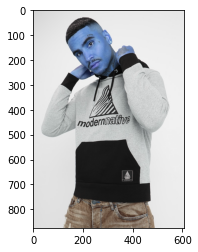

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR= "/content/drive/MyDrive/data/Fashion/zalando"
CATEGORIES = ["hoodies","hoodies-female","longsleeve","shirt","sweatshirt","sweatshirt-female"]
#category index: hoodies=0, hoodies_female=2, longsleeve=3, shirt=4, sweatshirt=5, sweatshirt-female=6

for category in CATEGORIES:
  path=os.path.join(DATADIR,category) #path to cateogories dir
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),) #grayscale
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break
  break

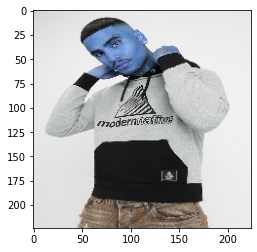

In [ ]:
#resize
IMG_SIZE=224
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [ ]:
training_data=[]
def create_training_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR,category) #path to cateogories dir
    class_num=CATEGORIES.index(category) #created indexes 0-6 for classes
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR) #color
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
        
create_training_data()

In [ ]:
print(len(training_data))

16180


In [ ]:
import random
random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:#upto 10
  print(sample[1])

3
4
0
4
1
3
3
3
3
3


In [ ]:
X=[]
y=[]

In [ ]:
for features, label in training_data:
  X.append(features)
  y.append(label)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3) #1 because gray

In [ ]:
print(X.shape)

(16180, 224, 224, 3)


In [ ]:
import tensorflow as tf 
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [ ]:
X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=0.1)

In [ ]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 6


In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [ ]:
#build CNN model

input_shape= (224,224,3)
i = Input(shape=input_shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(6, activation='softmax')(x)

model = Model(i, x) #input i and output x

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 111, 111, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856 

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
456/456 [==============================] - 157s 343ms/step - loss: 1.8030 - accuracy: 0.3237 - val_loss: 1.6510 - val_accuracy: 0.3282
Epoch 2/10
456/456 [==============================] - 157s 344ms/step - loss: 1.5563 - accuracy: 0.3870 - val_loss: 1.3784 - val_accuracy: 0.4845
Epoch 3/10
456/456 [==============================] - 153s 337ms/step - loss: 1.1872 - accuracy: 0.5277 - val_loss: 1.0332 - val_accuracy: 0.5766
Epoch 4/10
456/456 [==============================] - 155s 341ms/step - loss: 1.0160 - accuracy: 0.5866 - val_loss: 0.9541 - val_accuracy: 0.5977
Epoch 5/10
456/456 [==============================] - 151s 331ms/step - loss: 0.9183 - accuracy: 0.6095 - val_loss: 0.8821 - val_accuracy: 0.6286
Epoch 6/10
456/456 [==============================] - 153s 335ms/step - loss: 0.8481 - accuracy: 0.6314 - val_loss: 0.8747 - val_accuracy: 0.6112
Epoch 7/10
456/456 [==============================] - 152s 334ms/step - loss: 0.7977 - accuracy: 0.6421 - val_loss: 0.8399 -

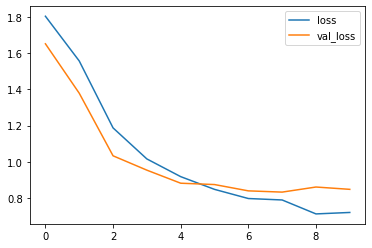

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

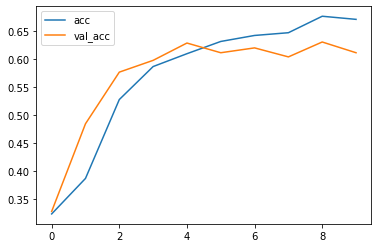

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 28   1   3   1 158  30]
 [  1   0   0   1   1 110]
 [  4   1  53   5 103  18]
 [  1   0   0 435   4  11]
 [ 76   0  25   5 248  36]
 [  4   4   5   1  20 225]]


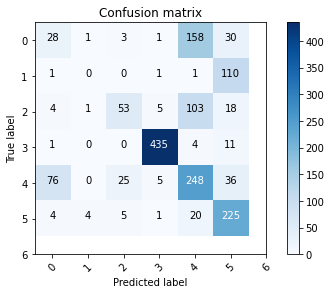

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(7)))



Category index: 

*   hoodies = 0
*   hoodies_female = 1
*   longsleeve = 2
*   shirt = 3
*   sweatshirt = 4
*   sweatshirt-female = 5


Confusion between:
1.  hoodies and sweatshirt
2.  hoodies-female and sweatshirt-female.

Shirts are more distinct so get correctly labeled the most often. 

Perhaps do data aug on hoodies-female

In [ ]:
# label mapping
labels = '''hoodies
hoodies-female
longsleeve
shirt
sweatshirt
sweatshirt-female
'''.split()

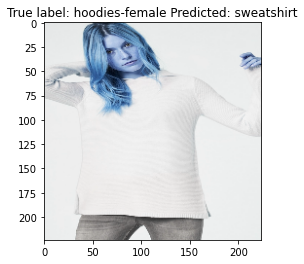

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i])
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));